ISTA 350 Final Project - Bennett Nottingham

Group members: Rohan Verma, Nik Pierce, William Nenad

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, math
import statsmodels.api as sm, datetime as dt

In [2]:
url = 'https://www.pro-football-reference.com/years/2021/'

In [3]:
AFC_teams = pd.read_html(url, index_col=0, na_values=0)[0]
NFC_teams = pd.read_html(url, index_col=0, na_values=0)[1]

In [4]:
AFC_teams.head()

,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
Tm,,,,,,,,,,,,
AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East
Buffalo Bills*,11,6,NaN,.647,483,289,194,11.4,-1.6,9.8,5.0,4.8
New England Patriots+,10,7,NaN,.588,462,303,159,9.4,-0.9,8.5,3.6,4.8
Miami Dolphins,9,8,NaN,.529,341,373,-32,-1.9,-0.8,-2.7,-3.1,0.3
New York Jets,4,13,NaN,.235,310,504,-194,-11.4,1.0,-10.4,-3.6,-6.7


In [5]:
NFC_teams.head()

,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
Tm,,,,,,,,,,,,
NFC East,NFC East,NFC East,NFC East,NFC East,NFC East,NFC East,NFC East,NFC East,NFC East,NFC East,NFC East,NFC East
Dallas Cowboys*,12,5,NaN,.706,530,358,172,10.1,-0.2,9.9,8.2,1.7
Philadelphia Eagles+,9,8,NaN,.529,444,385,59,3.5,-1.0,2.5,2.6,-0.1
Washington Football Team,7,10,NaN,.412,335,434,-99,-5.8,1.6,-4.2,-2.7,-1.5
New York Giants,4,13,NaN,.235,258,416,-158,-9.3,1.0,-8.3,-7.7,-0.6


In [6]:
AFC_teams = AFC_teams.drop(columns="T", axis=1)
NFC_teams = NFC_teams.drop(columns="T", axis=1)

In [7]:
NFL = pd.concat([AFC_teams, NFC_teams])

In [8]:
NFL.head(15)

,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
Tm,,,,,,,,,,,
AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East
Buffalo Bills*,11,6,.647,483,289,194,11.4,-1.6,9.8,5.0,4.8
New England Patriots+,10,7,.588,462,303,159,9.4,-0.9,8.5,3.6,4.8
Miami Dolphins,9,8,.529,341,373,-32,-1.9,-0.8,-2.7,-3.1,0.3
New York Jets,4,13,.235,310,504,-194,-11.4,1.0,-10.4,-3.6,-6.7
AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North
Cincinnati Bengals*,10,7,.588,460,376,84,4.9,-1.9,3.1,3.4,-0.3
Pittsburgh Steelers+,9,7,.559,343,398,-55,-3.2,0.8,-2.5,-2.6,0.1
Cleveland Browns,8,9,.471,349,371,-22,-1.3,NaN,-1.3,-2.7,1.3


In [9]:
NFL.drop(NFL.index[[0, 5, 10, 15, 20, 25, 30, 35]], inplace=True)

In [10]:
NFL.head()

,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
Tm,,,,,,,,,,,
Buffalo Bills*,11,6,.647,483,289,194,11.4,-1.6,9.8,5.0,4.8
New England Patriots+,10,7,.588,462,303,159,9.4,-0.9,8.5,3.6,4.8
Miami Dolphins,9,8,.529,341,373,-32,-1.9,-0.8,-2.7,-3.1,0.3
New York Jets,4,13,.235,310,504,-194,-11.4,1.0,-10.4,-3.6,-6.7
Cincinnati Bengals*,10,7,.588,460,376,84,4.9,-1.9,3.1,3.4,-0.3


In [11]:
NFL['W'] = NFL['W'].astype(str).astype(int)
NFL['L'] = NFL['L'].astype(str).astype(int)
NFL['PA'] = NFL['PA'].astype(str).astype(int)
NFL['W-L%'] = NFL['W-L%'].astype(str).astype(float)
NFL['PF'] = NFL['PF'].astype(str).astype(int)
NFL['PD'] = NFL['PD'].astype(str).astype(int)

In [12]:
highest_win_per_team = NFL.groupby('Tm')['W-L%'].sum().reset_index()
highest_win_per_team.columns = ['Tm', 'W-L%']
highest_win_per_team = highest_win_per_team.sort_values('W-L%', ascending=True)[22:]
highest_win_per_team.head()

,Tm,W-L%
21,New England Patriots+,0.588
27,San Francisco 49ers+,0.588
0,Arizona Cardinals+,0.647
3,Buffalo Bills*,0.647
30,Tennessee Titans*,0.706


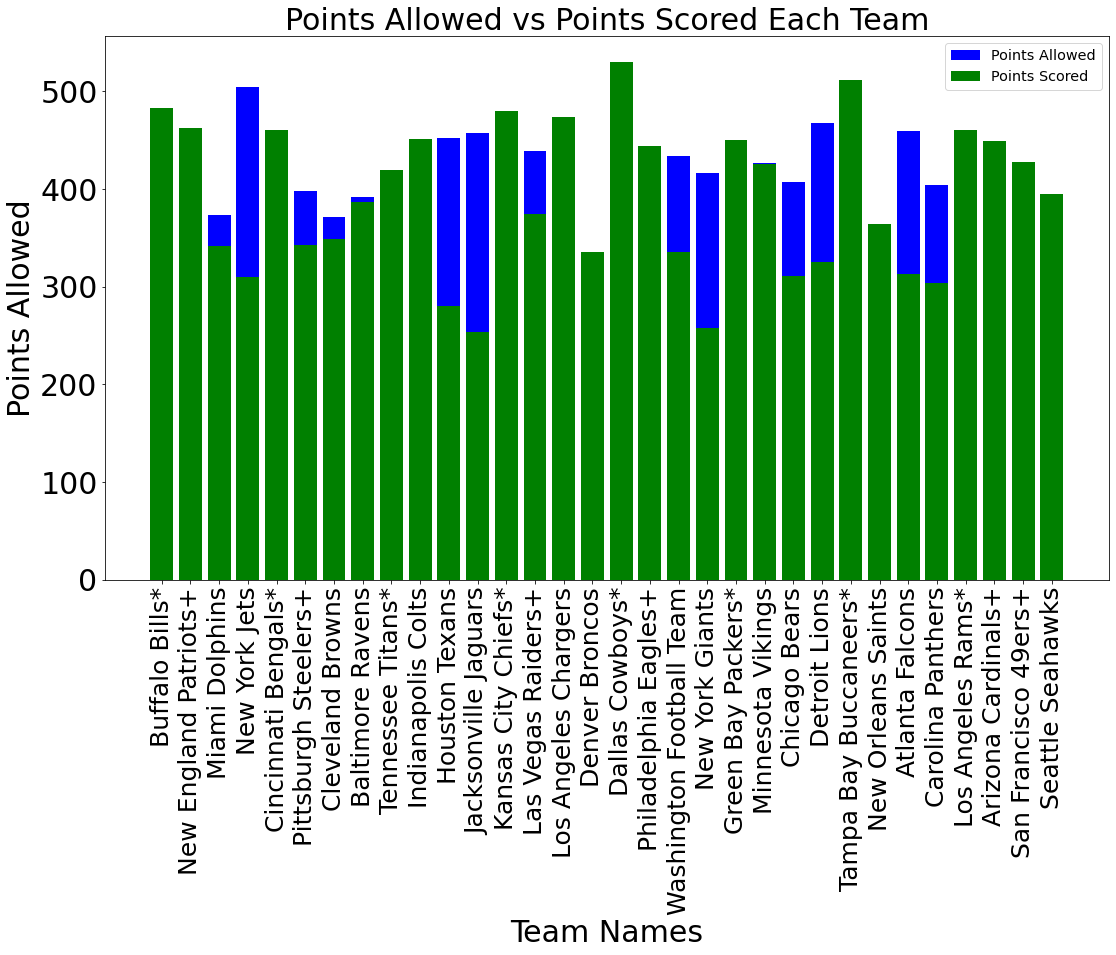

In [13]:
# Comparing teams points allowed vs points scored
plt.figure(figsize=(18,10))
plt.bar(NFL.index, NFL['PA'], color='b')
plt.bar(NFL.index, NFL['PF'], color='g')
plt.xticks(rotation=90, size=25)
plt.yticks(size=30)
plt.ylabel('Points Allowed', size=30)
plt.xlabel('Team Names', size=30)
plt.title('Top 10 Teams With Highest PA', size=30)
plt.title('Points Allowed vs Points Scored Each Team', size=30)
plt.legend(['Points Allowed', 'Points Scored'], fontsize="x-large")

In [14]:
highest_points_allowed = NFL.groupby('Tm')['PA'].sum().reset_index()
highest_points_allowed.columns = ['Tm', 'PA']
highest_points_allowed = highest_points_allowed.sort_values('PA', ascending=True)[22:]
highest_points_allowed.head()

,Tm,PA
23,New York Giants,416
20,Minnesota Vikings,426
31,Washington Football Team,434
16,Las Vegas Raiders+,439
12,Houston Texans,452


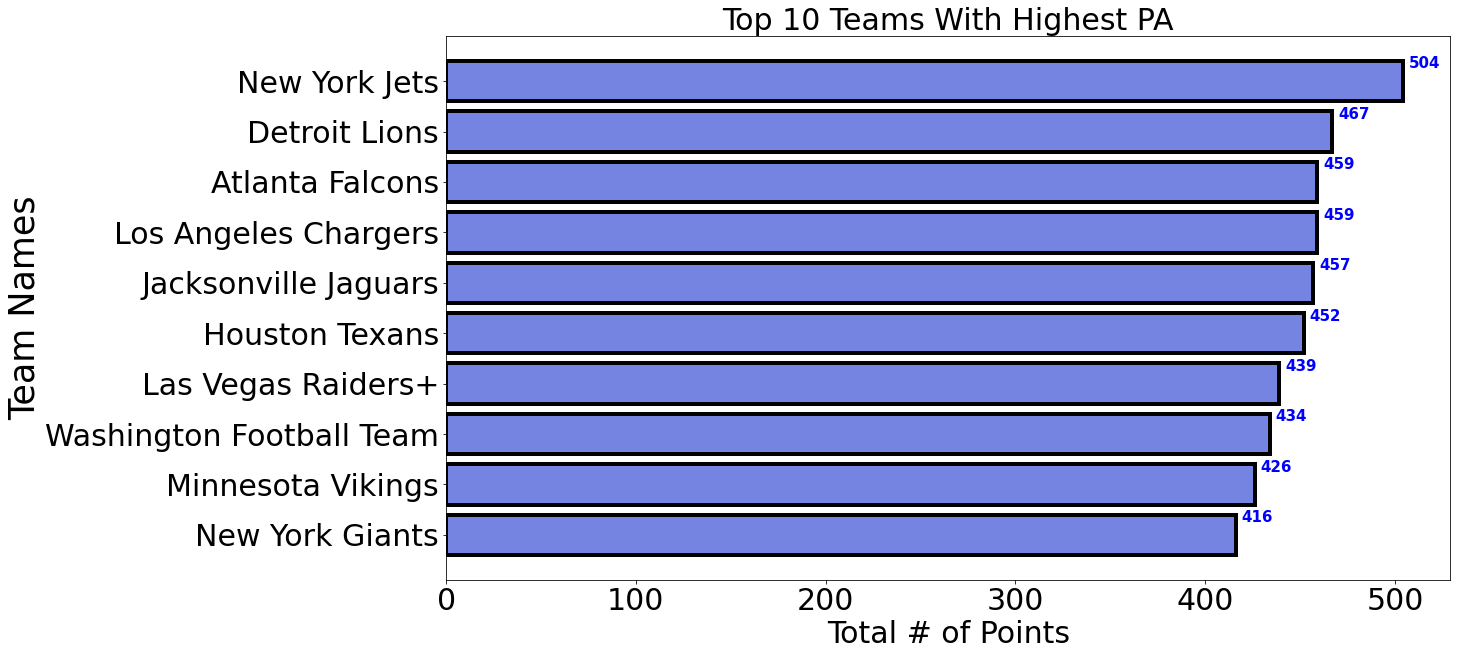

In [15]:
# Top 10 teams with highest PA (points allowed).
plt.figure(figsize=(18,10))
x = highest_points_allowed['Tm']
y = highest_points_allowed['PA']
plt.barh(x, y, color=(0.1, 0.2, 0.8, 0.6),  edgecolor='black', linewidth=4)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("Total # of Points", size=30)
plt.title("Top 10 Teams With Highest PA", size=30)
plt.ylabel("Team Names", size=35)
for i, v in enumerate(y):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold', size='15')
plt.show()

-0.0021869946086200682


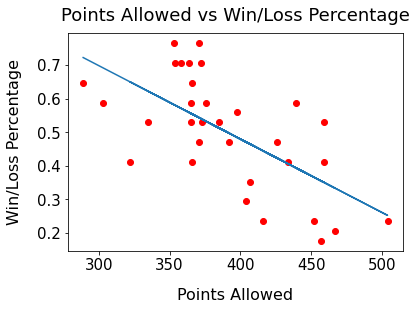

In [16]:
# scatter plot with regression line for points allowed & win/loss percentage
# negative linear relationship
a, b = np.polyfit(NFL['PA'], NFL['W-L%'], 1)
plt.scatter(NFL['PA'], NFL['W-L%'], c='red')
plt.title('Points Allowed vs Win/Loss Percentage', fontsize=18, y=1.03)
plt.xlabel("Points Allowed", fontsize=16, labelpad=15)
plt.ylabel('Win/Loss Percentage', fontsize=16, labelpad=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(NFL['PA'], a*NFL['PA']+b)
print(a)

0.001910787190237355


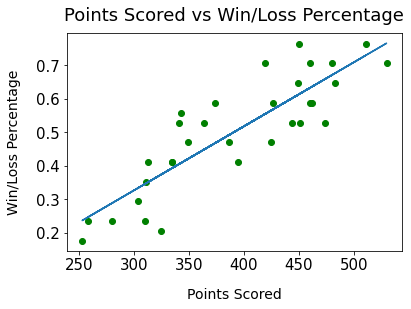

In [17]:
# scatter plot with regression line for points scored & win/loss percentage
# positive linear relationship
a, b = np.polyfit(NFL['PF'], NFL['W-L%'], 1)
plt.scatter(NFL['PF'], NFL['W-L%'], c='green')
plt.title('Points Scored vs Win/Loss Percentage', fontsize=18, y=1.03)
plt.xlabel("Points Scored", fontsize=14, labelpad=15)
plt.ylabel('Win/Loss Percentage', fontsize=14, labelpad=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(NFL['PF'], a*NFL['PF']+b)
print(a)

Simple Linear Regression Model (PA & W-L%)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
X_train, X_test, y_train, y_test = train_test_split(NFL['PA'], NFL['W-L%'])

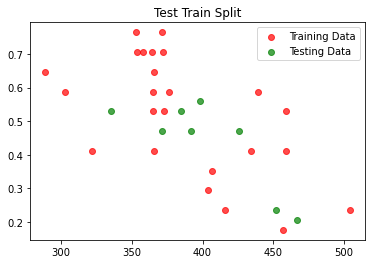

In [20]:
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [21]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

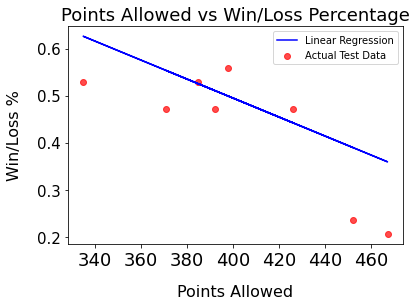

In [22]:
prediction = LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='r', alpha=.7)
plt.xticks(size = 18)
plt.yticks(size = 15)
plt.xlabel("Points Allowed", fontsize=16, labelpad=15)
plt.ylabel('Win/Loss %', fontsize=16, labelpad=15)
plt.title('Points Allowed vs Win/Loss Percentage', fontsize=18)
plt.legend()
plt.show()

In [23]:
# If a team allows 400 total points scored on them, we can expect them to have this W-L%
LR.predict(np.array([[400]]))[0]

0.49470060919062386

In [24]:
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.4616301508970547

Simple Linear Regression Model (PF & W-L%)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(NFL['PF'], NFL['W-L%'])

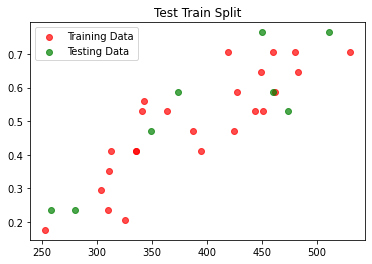

In [26]:
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [27]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

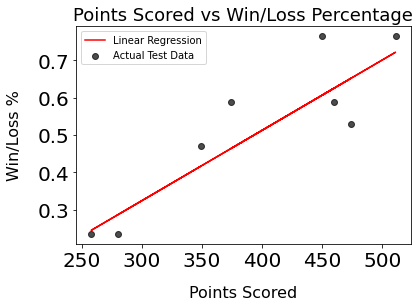

In [28]:
prediction = LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test, prediction, label='Linear Regression', color='red')
plt.scatter(X_test, y_test, label='Actual Test Data', color='black', alpha=.7)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Points Scored", fontsize=16, labelpad=15)
plt.ylabel('Win/Loss %', fontsize=16, labelpad=15)
plt.title('Points Scored vs Win/Loss Percentage', fontsize=18)
plt.legend()
plt.show()

In [29]:
# If a team scores 400 points for the season, we can expect them to have the W-L% below.
LR.predict(np.array([[400]]))[0]

0.5126034796847532

In [30]:
# This does a better job at predicting W-L% based off points scored for the season.
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.7803413584453217

Simple Linear Regression Model (Points Allowed & Number of Wins)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(NFL['PA'], NFL['W'])

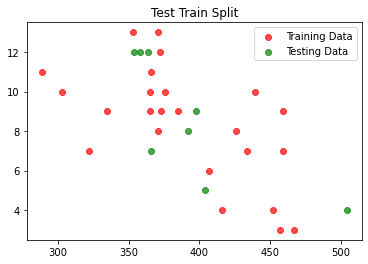

In [32]:
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [33]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

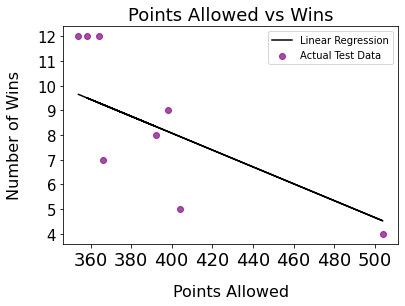

In [34]:
prediction = LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test, prediction, label='Linear Regression', color='black')
plt.scatter(X_test, y_test, label='Actual Test Data', color='purple', alpha=.7)
plt.xticks(size = 18)
plt.yticks(size = 15)
plt.xlabel("Points Allowed", fontsize=16, labelpad=15)
plt.ylabel('Number of Wins', fontsize=16, labelpad=15)
plt.title('Points Allowed vs Wins', fontsize=18)
plt.legend()
plt.show()

In [35]:
# If a team allowed 350 total points for the season, we can expect them to have 10 wins.
LR.predict(np.array([[350]]))[0]

9.784180770744623

In [36]:
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.5300264767206363